Edgardo González

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

In [17]:
stocks = ["PLTR","BABA","DIS","WIX"]
weights = np.array([0.10,0.10,0.10,0.70])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [18]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
BABA    0.001081
DIS     0.000227
PLTR    0.004508
WIX     0.000227
dtype: float64
\nMatriz de covarianza:
Ticker      BABA       DIS      PLTR       WIX
Ticker                                        
BABA    0.000718  0.000056  0.000178  0.000173
DIS     0.000056  0.000306  0.000221  0.000133
PLTR    0.000178  0.000221  0.001708  0.000308
WIX     0.000173  0.000133  0.000308  0.000915


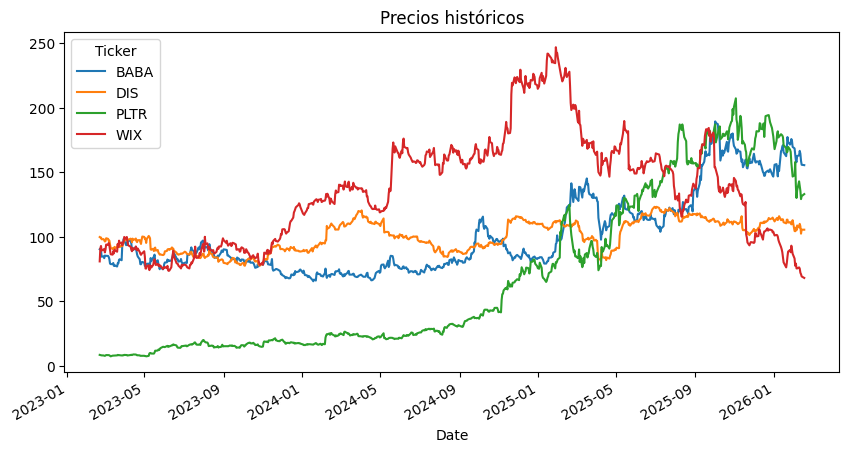

In [19]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

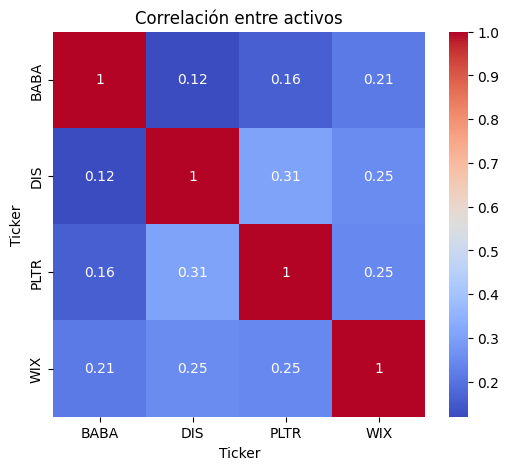

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

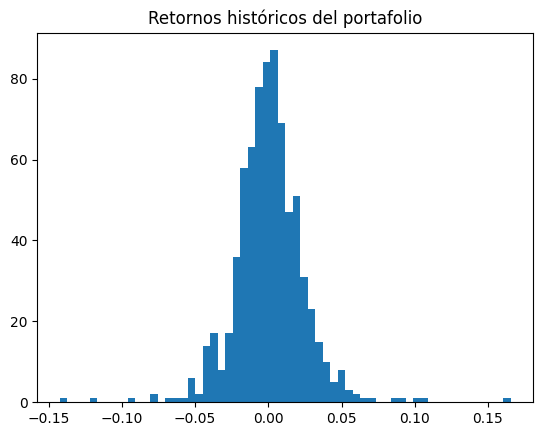

Volatilidad histórica diaria: 0.023886408303501312


In [21]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

In [22]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [23]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

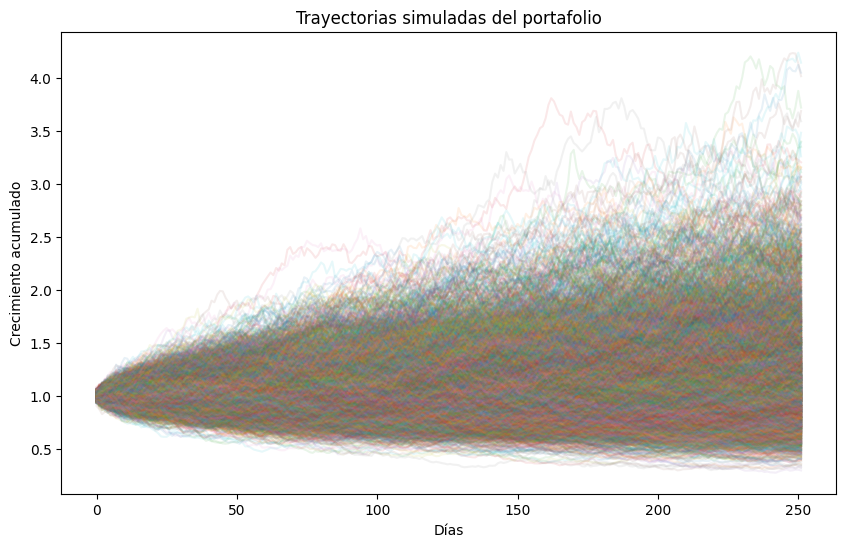

In [24]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

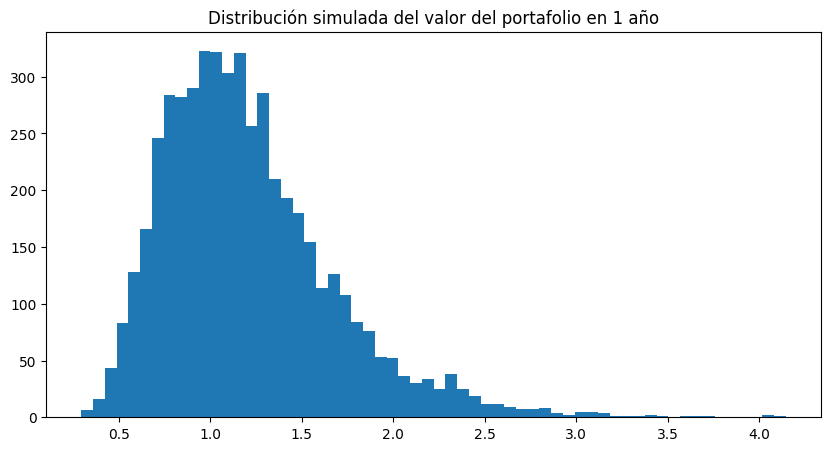

Valor esperado final: 1.2083339850530301
Probabilidad de pérdida: 0.373


In [25]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

In [26]:
#Valor promedio final del portafolio
print("Valor promedio final del portafolio:", final_values.mean())
# Valor máximo observado
print("Valor máximo observado:", final_values.max())
# Valor mínimo observado
print("Valor mínimo observado:", final_values.min())

Valor promedio final del portafolio: 1.2083339850530301
Valor máximo observado: 4.146964345657479
Valor mínimo observado: 0.29497657245445225


**Respondido antes de cambiar el código:**

¿Las trayectorias simuladas son similares entre sí o muy distintas? Se observa una clara similitud en las rutas simuladas, lo cual es lógico dado que comparten la misma base de variables y condiciones iniciales.

¿La dispersión aumenta con el tiempo? Efectivamente, se aprecia que la variabilidad de los resultados se expande conforme el horizonte temporal avanza.

¿Qué observas en la distribución final del portafolio? Se nota una asimetría hacia la derecha en los resultados finales, lo que indica que el portafolio tiende a concentrarse en valores más altos conforme finaliza la simulación.

**Después de cambiar los tickers y el peso:**

¿Qué observas al modificar el portafolio o el horizonte? 

Se sigue observando un sesgo en los datos y las simulaciones guardan bastante parecido entre ellas, aunque la correlación sea muy distinta a la anterior. Como es de esperar, a mayor tiempo de simulación, la dispersión de los posibles escenarios aumenta. Un punto clave aquí es el peso que le di a WIX; como este activo ha estado a la baja, terminó arrastrando la distribución de los rendimientos hacia la izquierda, lo que refleja una mayor probabilidad de obtener retornos negativos.
